## Assessment / Midterm: Machine Vision and Deep Learning
<span style="color:blue">
    
1) Answer all questions
    
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc

3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)

4) Upload the **answer notebook & trained model** (for Question 3) to your github.

5) Submit the assessment by sharing the link to your github containing the answers.
    
</span>

***NAME: WAN NURUL AISYAH BINTI WAN KHAIRUL ANNUAR***

**MATRIC NO: 1919658***

**QUESTION 1 [15 marks]**

a) Let *k*, *s* and *p* be 4, 2 and 1, respectively. What will be the shape of the output of the convolutional layer? (2 marks)

>>import torch \
import torch.nn as nn \
input_img = torch.rand(1,3,10,10) \
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=*k*, stride=*s*, padding=*p*)


**Answer:** The shape of the output is 8 x 8 x 12
    


b) Batch Normalization (BN) normalizes the mean and standard deviation for each: (tick X for the correct answer(s)) (2 marks)

 - [X] Individual feature map
 - [X] Instance in the mini-batch
 - [ ] Spatial dimension    

c) Which one of the following is not an advantage of Batch Normalization (BN)? (tick X for the correct answer(s)) (2 marks)

- [ ] BN accelerates the training of deep neural networks and tackles the vanishing gradient problem.
- [X] For every input mini-batch, we calculate different statistics. This introduces some sort of regularization.
- [ ] BN reduces the dependence of gradients on the scale of the parameters or of their initial values.
- [X] BN needs a much slower learning rate for the total architecture to converge.

d) Choose the correct statement. (tick X for the correct answer) (2 marks)

- [X] A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.
- [ ] A larger kernel is preferred for information that resides locally, and a smaller kernel is preferred for information that is distributed globally.

e) In the following network, how many learnable parameters (weights) are there? (2 marks)

In [ ]:
model = nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,2)
    )

In [ ]:
import torch
import torch.nn as nn

# Define the model
model = nn.Sequential(
    nn.Linear(3, 20),
    nn.ReLU(),
    nn.Linear(20, 2)
)

# Function to calculate the learnable parameters
def learnable_parameters(model):
    num_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return num_parameters

# Calculate the number of learnable parameters
num_learnable_parameters = learnable_parameters(model)
print("Number of learnable parameters:", num_learnable_parameters)

Number of learnable parameters: 122



**Answer:** There are 122 learnable parameters.


f) Which of the following statements are true about deep neural networks? (tick X for the correct answer) (2 marks)

- [X] Deep neural networks usually require a big amount of data to be properly trained.
- [ ] They can be fooled by adversarial/ noisy examples.
- [ ] They are difficult to interpret and understand.
- [X] They can still be subject to biases.
- [ ] They fail to understand the context of the data that they are handling.
- [ ] They perform very well on individual tasks but fail to generalize to many different tasks.

g) Run the code in the next cell.

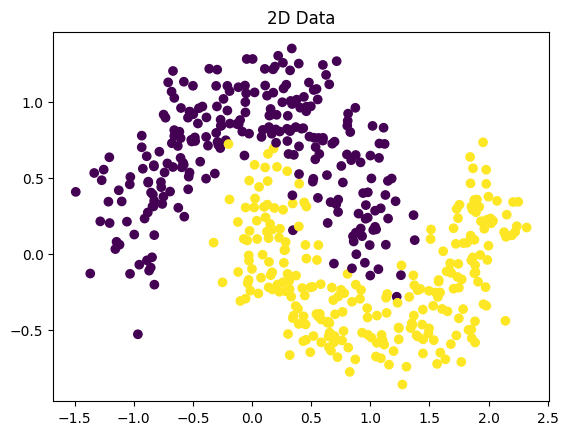

In [ ]:
# import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic data in 2D
X, Y = make_moons(500, noise=0.2)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('2D Data')
plt.show()

Can this data be correctly separable using the classifier below? Why? (3 marks)

model = nn.Sequential( \
    nn.Linear(n_input_dim, n_output), \
    nn.Sigmoid() \
    )
    


**Answer:**
    
No, the given data cannot be correctly separable using the classifier below.

The reason is that the data is 2D, and the classifier is a 1-layer neural network with a single output node and a sigmoid activation function. This means that the classifier can only model one decision boundary in the data, and hence, it can only correctly classify the data if the data is linearly separable in 1D.

However, the 2D data consists of two half-moon shapes, which are not linearly separable in 1D. Therefore, the classifier cannot correctly classify the data.

If we want to correctly classify this 2D data, we need a classifier that can model more complex decision boundaries. For example, we could use a multi-layer neural network with multiple hidden layers and sigmoid activation functions. Alternatively, we could use a more sophisticated machine learning model such as a support vector machine (SVM) or a decision tree.


**QUESTION 2 [40 marks]**

The COVID-19 pandemic continues to have a devastating effect on the health and well-being of the global population. A critical step in the fight against COVID-19 is effective screening of infected patients, with one of the key screening approaches being radiology examination using chest radiography. As a deep learning engineer, you are tasked to classify a dataset of X-ray images as either "normal", "covid" or "viral pneumonia". Use the chest X-ray dataset publicly available at https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset to answer the following questions.


a) Create and train a ConvNet corresponding to the following architecture in Fig. 1 (with modifications of the input and final layers). Please include **(10 marks)**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)
    
                                Fig. 1: A convolutional neural network

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets,models

import torchvision.transforms as transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transform = transforms.Compose(
    [ transforms.Grayscale(num_output_channels=1),  # convert image to grayscale
      transforms.Resize((32,32)),  # resize the image
      transforms.ToTensor(),  # convert to 4D-Tensor (R,G,B,batch)
      transforms.Normalize([0.485], [0.229])  # normalize the grayscale channel
    ]
)

train_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Covid19-dataset/test'

train_data = datasets.ImageFolder(root=train_dir, transform=transform)
test_data = datasets.ImageFolder(root=test_dir, transform=transform)


In [ ]:
class_names = train_data.classes
class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

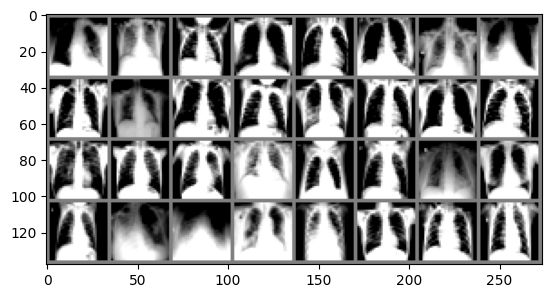

Covid Covid Normal Covid Viral Pneumonia Covid Covid Covid Normal Covid Covid Normal Normal Normal Covid Viral Pneumonia Covid Normal Viral Pneumonia Covid Viral Pneumonia Viral Pneumonia Covid Covid Viral Pneumonia Covid Covid Covid Viral Pneumonia Normal Viral Pneumonia Viral Pneumonia


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Visualize our dataset
def show_image(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
show_image(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % class_names[labels[j]] for j in range(32)))

In [ ]:
train_imgBatch, train_labelBatch = next(iter(train_dataloader))
train_imgBatch.shape

torch.Size([32, 1, 32, 32])

In [ ]:
# Define the model
class CNNmodel(nn.Module):
  def __init__(self):
    super(CNNmodel,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) #28x28x6
    self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2) #14x14x6
    self.conv2 = nn.Conv2d(6,16,5) #10x10x16
    self.maxpool2 = nn.MaxPool2d(kernel_size=2,stride=2) #5x5x16
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,10)
    self.relu = nn.ReLU()
    self.flatten = nn.Flatten()

  def forward(self,x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.maxpool1(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.maxpool2(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.relu(x)
    out = self.fc2(x)

    return out

In [ ]:
model = CNNmodel()
model.to('cuda')

CNNmodel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history

In [ ]:
!pip install torchinfo

from torchinfo import summary

summary(model= model)

Layer (type:depth-idx)                   Param #
CNNmodel                                 --
├─Conv2d: 1-1                            156
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            2,416
├─MaxPool2d: 1-4                         --
├─Linear: 1-5                            48,120
├─Linear: 1-6                            1,210
├─ReLU: 1-7                              --
├─Flatten: 1-8                           --
Total params: 51,902
Trainable params: 51,902
Non-trainable params: 0

In [ ]:
# Loss and Optimizer

# cross-entropy loss
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
num_epochs = 10
trained_CNNModel, history = train_and_validate(model,loss_fn,optimizer,train_dataloader,test_dataloader,num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.7934, Accuracy: 69.3227%, 
		Validation : Loss : 0.6242, Accuracy: 78.7879%, Time: 9.0617s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.5695, Accuracy: 73.7052%, 
		Validation : Loss : 0.6397, Accuracy: 65.1515%, Time: 10.0445s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.4337, Accuracy: 82.4701%, 
		Validation : Loss : 0.8226, Accuracy: 69.6970%, Time: 10.1744s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.3460, Accuracy: 86.0558%, 
		Validation : Loss : 1.2678, Accuracy: 66.6667%, Time: 8.6281s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.4310, Accuracy: 85.2590%, 
		Validation : Loss : 0.8664, Accuracy: 69.6970%, Time: 10.2395s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.4198, Accuracy: 86.4542%, 
		Validation : Loss : 0.4950, Accuracy: 78.7879%, Time: 10.2570s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.2601, Accuracy: 89.6414%, 
		Validation : Loss : 0.5572, Accuracy: 77.2727%, Time: 8.6630s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.1938, Accuracy:

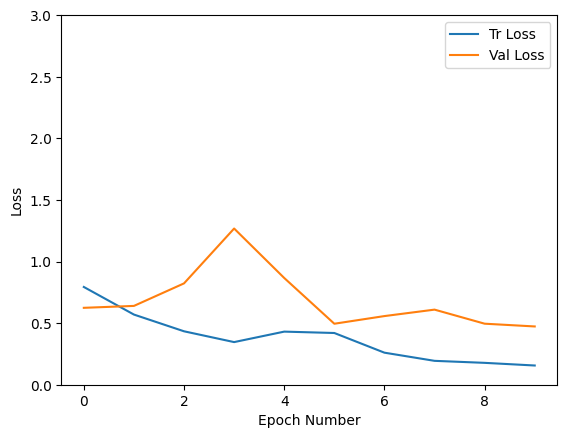

In [ ]:
def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('loss_curve.png')
  plt.show()

plot_loss(history)

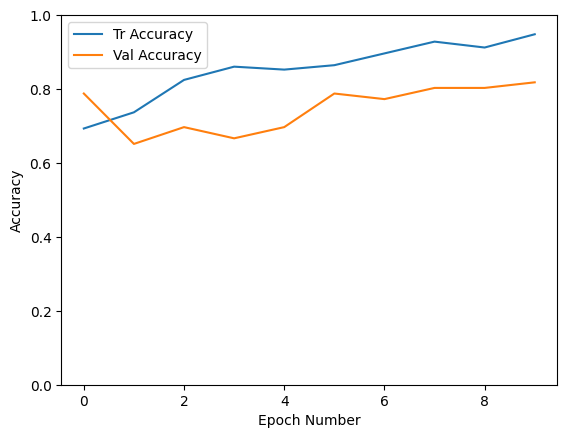

In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('accuracy_curve.png')
  plt.show()

plot_accuracy(history)

b) Based on Question 2 a), answer the following questions:
    
    i) Is the model overfitting? Why? (4 marks)
   <font color='blue'>Based on the graph plottedabove, the model is identified as overfitting based on its indicated signs. First, we can observe the comparison between training and validation loss. Overfitting is frequently identified by a significant difference between these two measures; a scenario in which the training loss continuously reduces while the validation loss stagnates or even increases indicates that the model has been overly customized to the intricacies of the training data. Moreover, from the accuracy diagram, a significant difference between training and validation accuracy indicates that the model remembers certain characteristics of the training data but is unable to generalize to new, undiscovered examples.</font>
    
    ii) Propose two methods to reduce the effect of overfitting. (4 marks)
   <font color='blue'>Two methods that I propose are: (1) Dropout
 (2) Weight Decay</font>
   
    iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets,models

import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [ transforms.Grayscale(num_output_channels=1),  # convert image to grayscale
      transforms.Resize((32,32)),  # resize the image
      transforms.ToTensor(),  # convert to 4D-Tensor (R,G,B,batch)
      transforms.Normalize([0.485], [0.229])  # normalize the grayscale channel
    ]
)

train_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Covid19-dataset/test'

train_data = datasets.ImageFolder(root=train_dir, transform=transform)
test_data = datasets.ImageFolder(root=test_dir, transform=transform)


In [ ]:
class_names = train_data.classes
class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

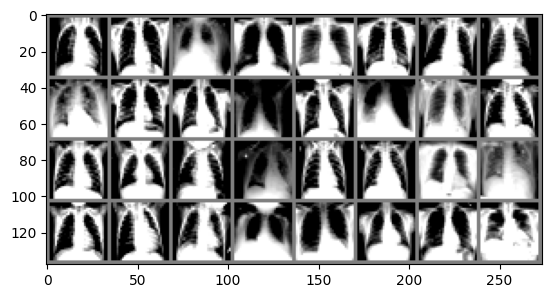

Viral Pneumonia Normal Covid Covid Covid Normal Viral Pneumonia Viral Pneumonia Covid Normal Normal Covid Normal Covid Covid Normal Viral Pneumonia Normal Viral Pneumonia Covid Viral Pneumonia Viral Pneumonia Covid Covid Normal Viral Pneumonia Viral Pneumonia Covid Covid Normal Covid Covid


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Visualize our dataset
def show_image(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
show_image(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % class_names[labels[j]] for j in range(32)))

In [ ]:
train_imgBatch, train_labelBatch = next(iter(train_dataloader))
train_imgBatch.shape

torch.Size([32, 1, 32, 32])

In [ ]:
# Define new Dropout model
class Dropoutmodel(nn.Module):
  def __init__(self):
    super(Dropoutmodel,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5) #28x28x6
    self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2) #14x14x6
    self.conv2 = nn.Conv2d(6,16,5) #10x10x16
    self.maxpool2 = nn.MaxPool2d(kernel_size=2,stride=2) #5x5x16
    self.fc1 = nn.Linear(16*5*5,120)
    self.dropout = nn.Dropout(0.5) # Add dropout layer
    self.fc2 = nn.Linear(120,10)
    self.relu = nn.ReLU()
    self.flatten = nn.Flatten()

  def forward(self,x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.maxpool1(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.maxpool2(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.dropout(x) # Apply dropout after fc1
    x = self.relu(x)
    out = self.fc2(x)

    return out


In [ ]:
model = Dropoutmodel()
model.to('cuda')

Dropoutmodel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
  (relu): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history

In [ ]:
!pip install torchinfo

from torchinfo import summary

summary(model= model)

Layer (type:depth-idx)                   Param #
Dropoutmodel                             --
├─Conv2d: 1-1                            156
├─MaxPool2d: 1-2                         --
├─Conv2d: 1-3                            2,416
├─MaxPool2d: 1-4                         --
├─Linear: 1-5                            48,120
├─Dropout: 1-6                           --
├─Linear: 1-7                            1,210
├─ReLU: 1-8                              --
├─Flatten: 1-9                           --
Total params: 51,902
Trainable params: 51,902
Non-trainable params: 0

In [ ]:
# Loss and Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)  # add weight decay

In [ ]:
num_epochs = 10
trained_DropoutModel, history = train_and_validate(model,loss_fn,optimizer,train_dataloader,test_dataloader,num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 2.2871, Accuracy: 10.7570%, 
		Validation : Loss : 2.1694, Accuracy: 34.8485%, Time: 13.4786s
Epoch: 2/10
Epoch : 001, Training: Loss: 2.0323, Accuracy: 39.4422%, 
		Validation : Loss : 1.7964, Accuracy: 39.3939%, Time: 8.8839s
Epoch: 3/10
Epoch : 002, Training: Loss: 1.5793, Accuracy: 47.0120%, 
		Validation : Loss : 1.2405, Accuracy: 39.3939%, Time: 10.4282s
Epoch: 4/10
Epoch : 003, Training: Loss: 1.2564, Accuracy: 45.0199%, 
		Validation : Loss : 1.0166, Accuracy: 83.3333%, Time: 9.0669s
Epoch: 5/10
Epoch : 004, Training: Loss: 1.0109, Accuracy: 60.9562%, 
		Validation : Loss : 0.9548, Accuracy: 56.0606%, Time: 9.2565s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.9960, Accuracy: 60.1594%, 
		Validation : Loss : 0.8233, Accuracy: 63.6364%, Time: 9.8942s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.8883, Accuracy: 64.1434%, 
		Validation : Loss : 0.7766, Accuracy: 63.6364%, Time: 8.8745s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.8563, Accuracy: 6

c) Replace your defined ConvNet in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the COVID-19 dataset. **(10 marks)**

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets,models

import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [ transforms.Grayscale(num_output_channels=3),  # convert grayscale image to 3-channel
      transforms.Resize((32,32)),  # resize the image
      transforms.ToTensor(),  # convert to 4D-Tensor (R,G,B,batch)
      transforms.Normalize([0.485], [0.229])  # normalize the grayscale channel
    ]
)

train_dir = '/content/drive/MyDrive/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Covid19-dataset/test'

train_data = datasets.ImageFolder(root=train_dir, transform=transform)
test_data = datasets.ImageFolder(root=test_dir, transform=transform)


In [ ]:
class_names = train_data.classes
class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    # accuracy = torchmetrics.Accuracy(device=device)
    # Initialize the accuracy metric from torchmetrics
    # accuracy = torchmetrics.classification.Accuracy(task="multiclass", num_classes=10).to(device)

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history

In [ ]:
model_pretrained = models.resnet18(pretrained=True)
model_pretrained

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
!pip install torchinfo
from torchinfo import summary

summary(model=model_pretrained,
        input_size=(32, 3, 32, 32), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 32, 32]      [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 32, 32]      [32, 64, 16, 16]     9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 16, 16]     [32, 64, 16, 16]     128                  True
├─ReLU (relu)                            [32, 64, 16, 16]     [32, 64, 16, 16]     --                   --
├─MaxPool2d (maxpool)                    [32, 64, 16, 16]     [32, 64, 8, 8]       --                   --
├─Sequential (layer1)                    [32, 64, 8, 8]       [32, 64, 8, 8]       --                   True
│    └─BasicBlock (0)                    [32, 64, 8, 8]       [32, 64, 8, 8]       --                   True
│    │    └─Conv2d (conv1)               [32, 64, 8, 8]       [32, 64, 8, 8]       36,864               True
│    │    └─BatchN

In [ ]:
num_ftrs = model_pretrained.fc.in_features
model_pretrained.fc = nn.Linear(num_ftrs, 3)

In [ ]:
model_pretrained = model_pretrained.to('cuda')

In [ ]:
# loss and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_pretrained.parameters(), lr=0.01, momentum=0.9, weight_decay=0.001)

In [ ]:
num_epochs = 10
trained_MyModel, history = train_and_validate(model_pretrained,loss_fn,optimizer,train_dataloader,test_dataloader,num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.7488, Accuracy: 66.9323%, 
		Validation : Loss : 0.6261, Accuracy: 74.2857%, Time: 100.6374s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.4938, Accuracy: 87.2510%, 
		Validation : Loss : 1.7164, Accuracy: 62.8571%, Time: 16.6104s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.4043, Accuracy: 86.8526%, 
		Validation : Loss : 1.8654, Accuracy: 75.7143%, Time: 17.6156s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.2748, Accuracy: 92.8287%, 
		Validation : Loss : 1.5292, Accuracy: 70.0000%, Time: 16.8514s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.1092, Accuracy: 95.2191%, 
		Validation : Loss : 1.7450, Accuracy: 75.7143%, Time: 16.7537s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.1459, Accuracy: 96.4143%, 
		Validation : Loss : 1.6814, Accuracy: 72.8571%, Time: 16.7432s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.0489, Accuracy: 97.6096%, 
		Validation : Loss : 0.4762, Accuracy: 90.0000%, Time: 16.6265s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.0571, Accur

d) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **(4 marks)**

**Answer:**

<span style="color:blue">
    Yes there is an improvement in accuracy from 75.7576% before applying transfer learning to 81.4286% after implementing it. Pre-trained models like ResNet are trained on large datasets, which contains over a million images with 1000 categories. This extensive training allows the model to learn a wide variety of features, which can be useful for many different tasks. When you use a pre-trained model, you’re leveraging these learned features, which can lead to improved performance even if your dataset is relatively small.</span>

**QUESTION 3** **[15 marks]**

In a machine vision project, you decide to design a door access control system based on hand gestures. Only those who shows the correct hand gesture will be granted the access. There are three gestures that are recognized as correct access passcode which are "shaka", "peace" and "thumbs up", as depicted in Fig. 2.

![pic](https://simplyorganizedhi.com/media/catalog/product/1/6/169500.jpg)

                                Fig. 2 Shaka,peace, and thumbs up


Using the end-to-end object detection pipeline that you have learned, develop your own hand gesture detector so that it can be incorporate to a door access control system.

Deliverable for this question is the model .pt file. Change the name to <your_name>.pt file (e.g. hasan.pt).

- Marks are given based on the performance of the model when tested using my machine and camera at my office. This question aims to evaluate the model's robustness and generalization capabilities.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VVQUMuFHdt9nL3IWR65C")
project = rf.workspace("mv-qdsb5").project("door-access-control-system-amgzl")
dataset = project.version(2).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Door-Access-Control-System-2 in yolov8:: 100%|██████████| 462/462 [00:00<00:00, 4948.66it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/Door-Access-Control-System-2/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 170MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Door-Access-Control-System-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		train_batch197.jpg
confusion_matrix.png				    results.csv		train_batch1.jpg
events.out.tfevents.1704203509.8e842641ba5f.2870.0  results.png		train_batch2.jpg
F1_curve.png					    train_batch0.jpg	val_batch0_labels.jpg
P_curve.png					    train_batch195.jpg	val_batch0_pred.jpg
PR_curve.png					    train_batch196.jpg	weights


/content


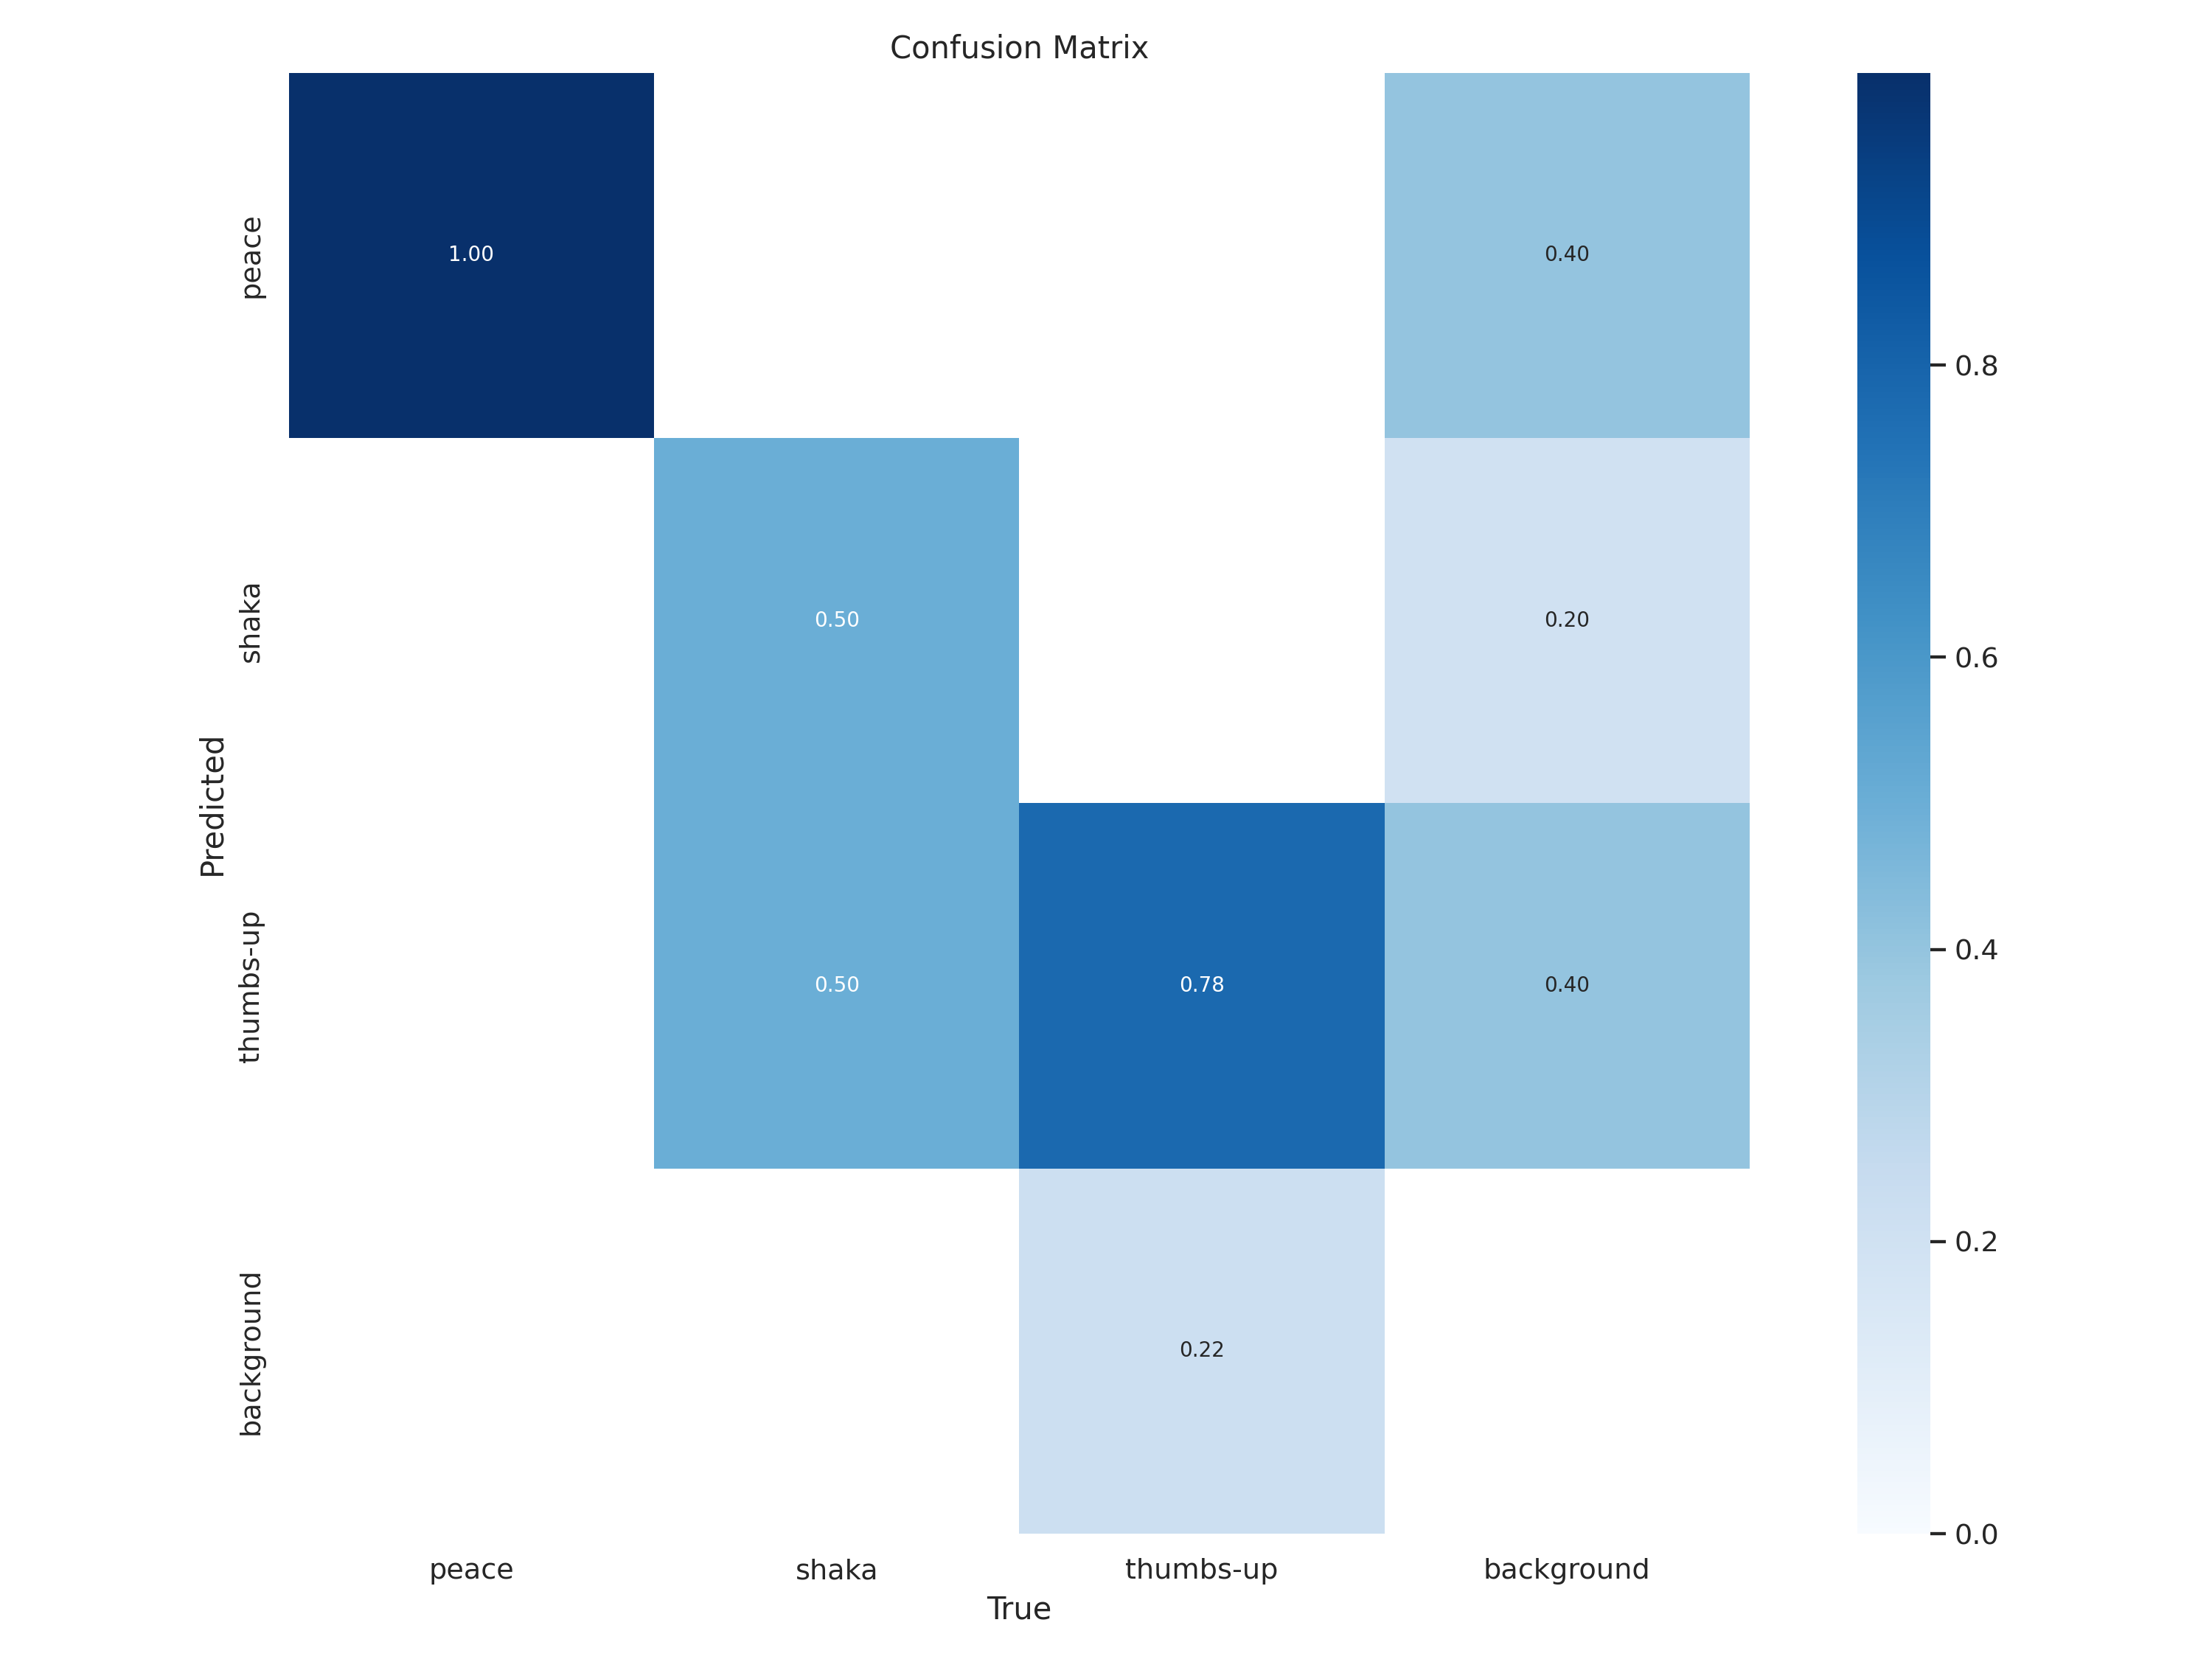

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


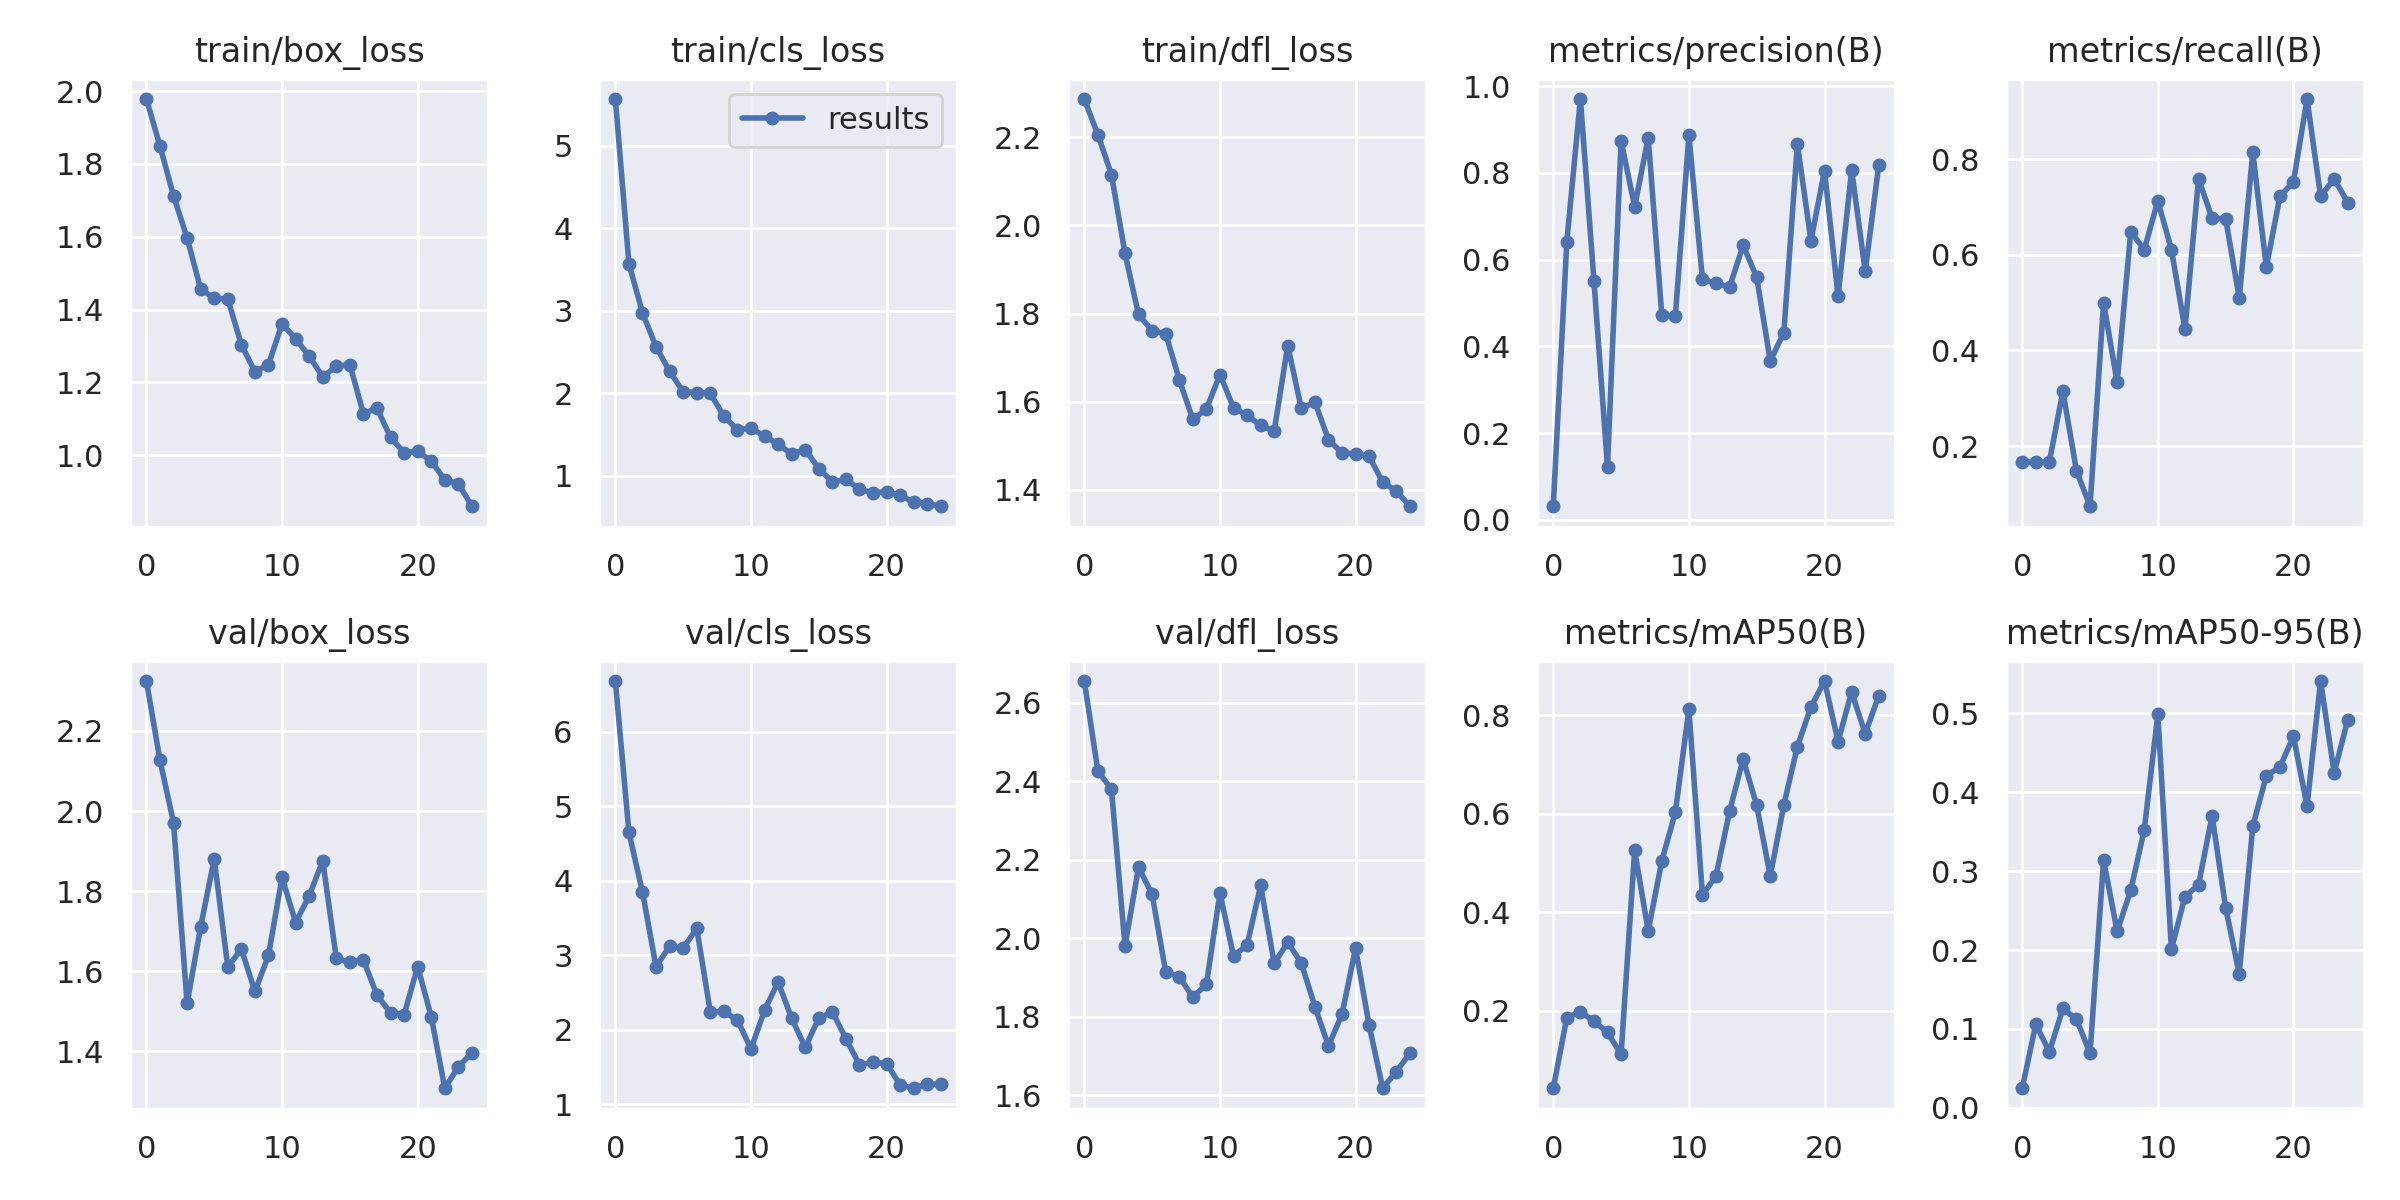

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


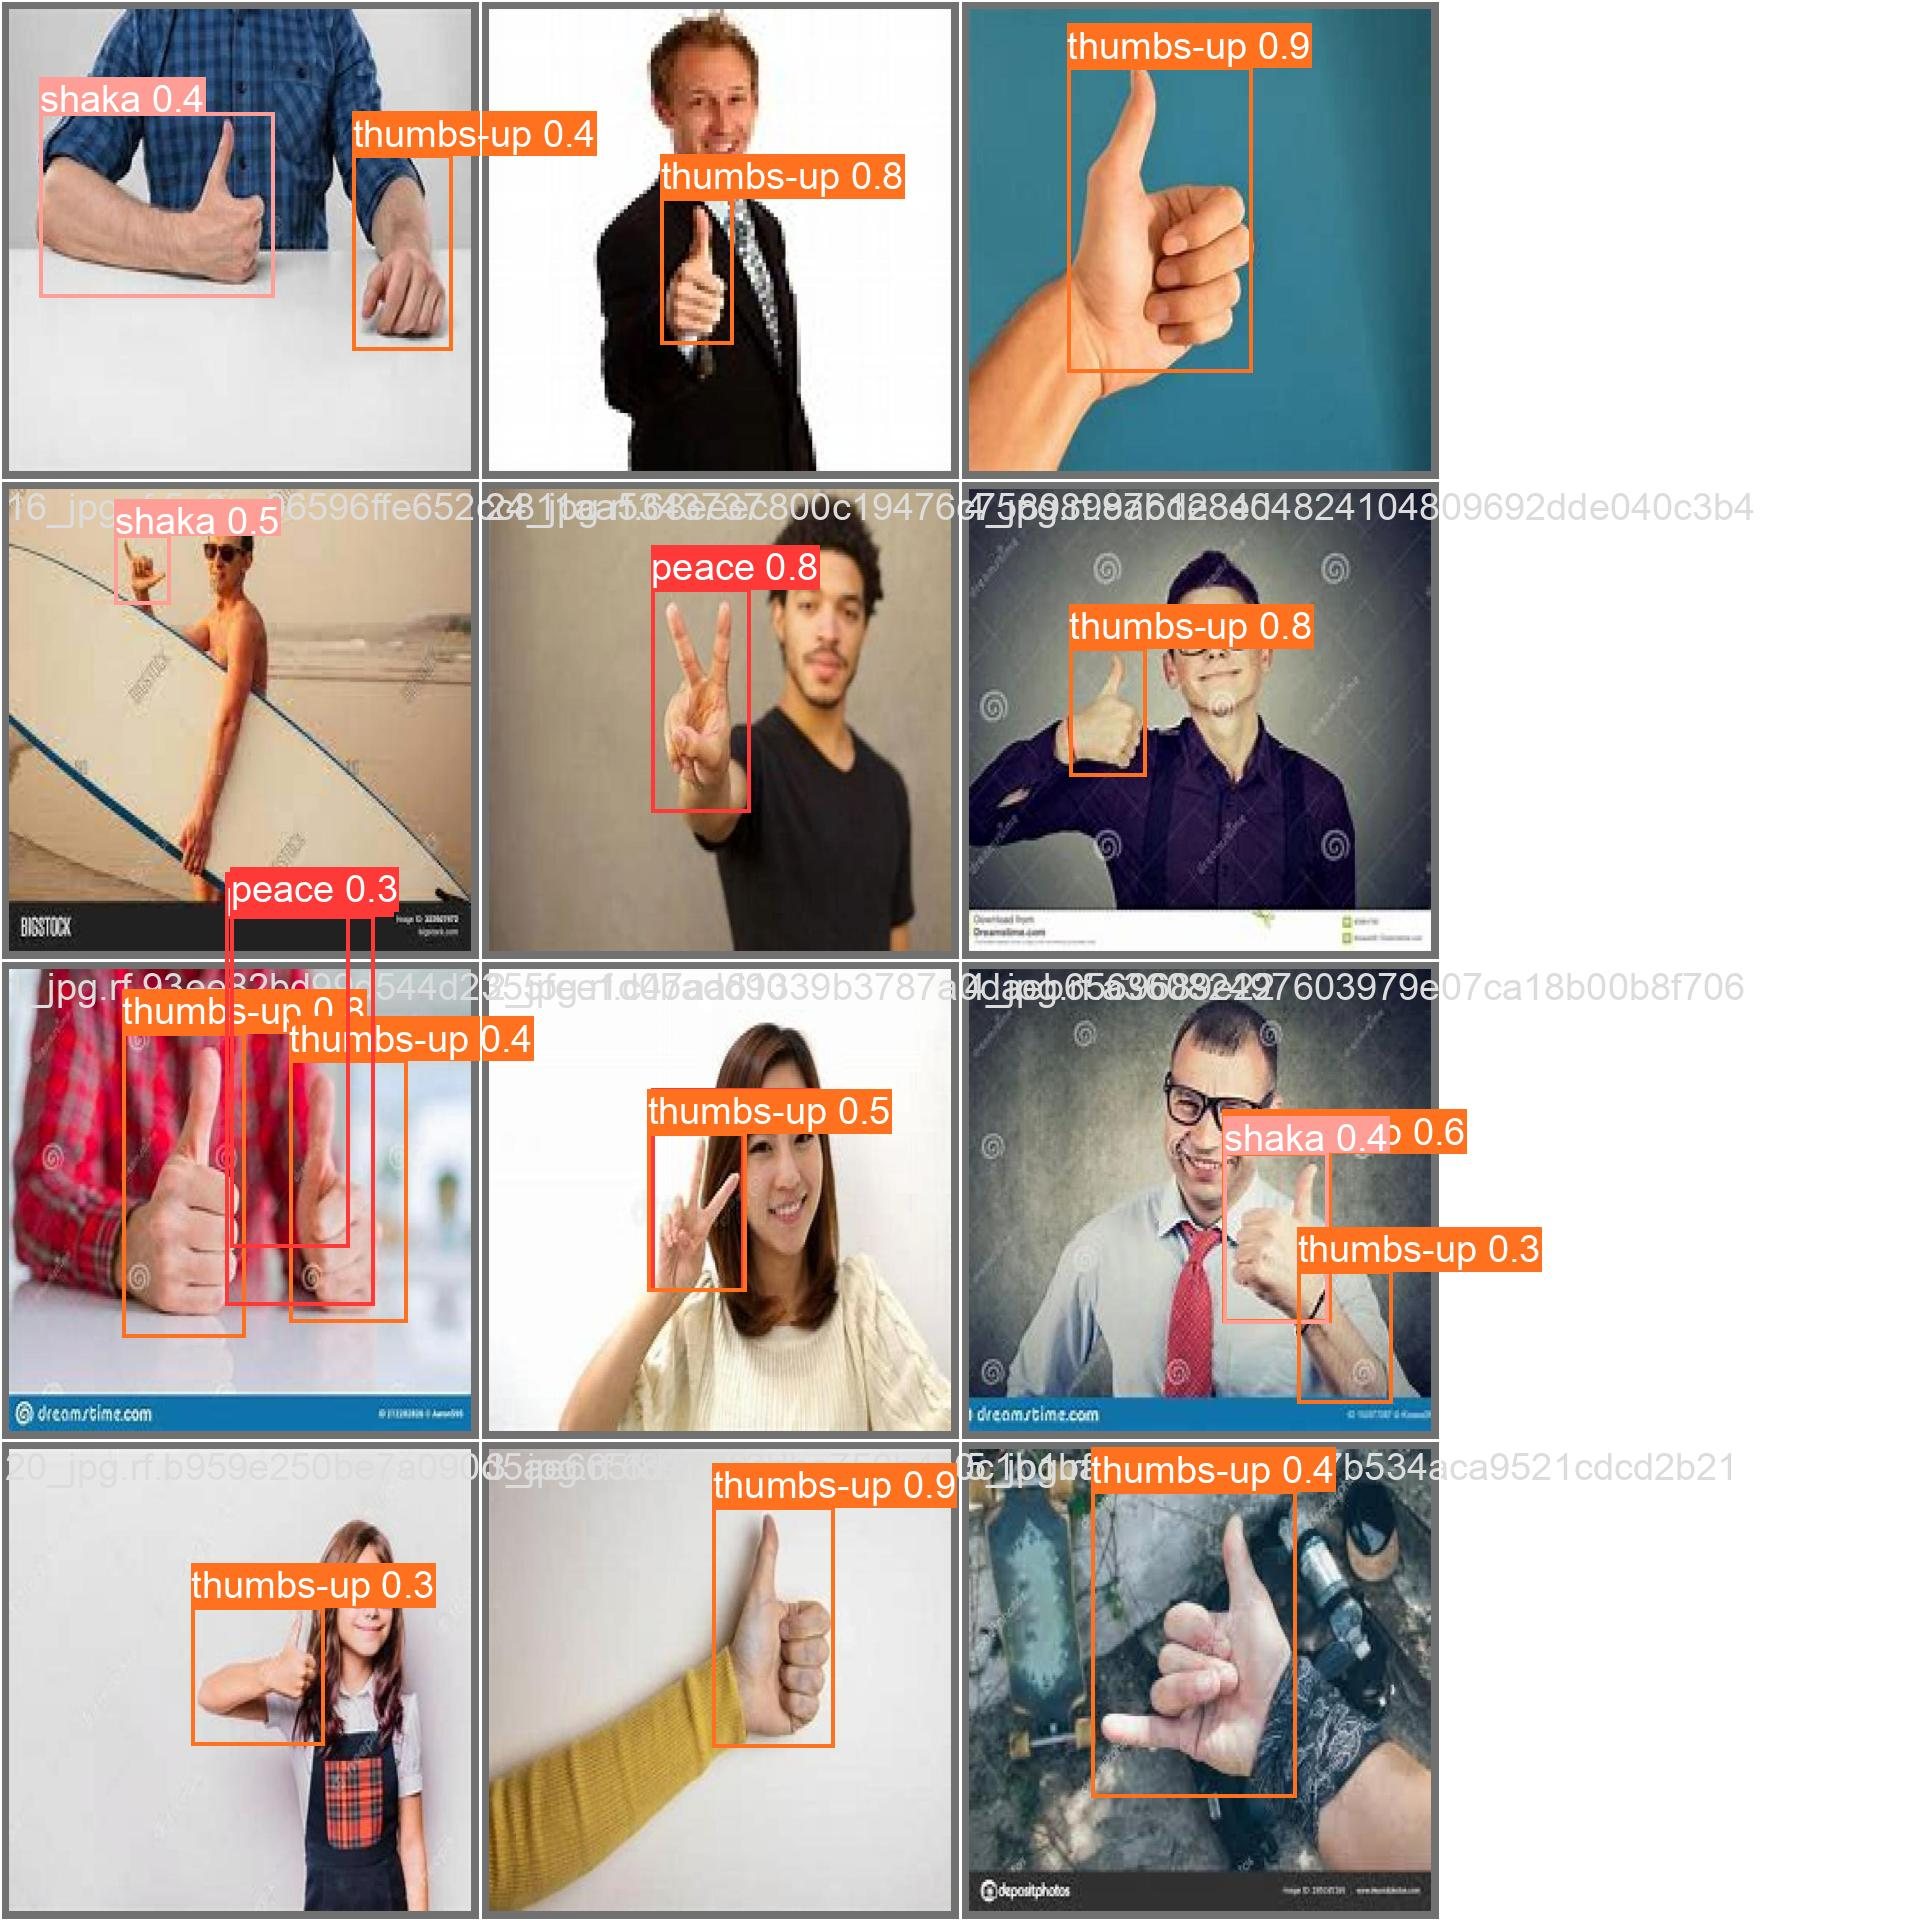

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2024-01-02 13:57:07.100691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 13:57:07.100767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 13:57:07.102208: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 13:57:08.161828: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Door-Access-Control-System-2/val

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2024-01-02 14:00:24.959397: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 14:00:24.959461: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 14:00:24.961448: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 14:00:26.690974: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/9 /content/datasets/Door-Access-Control-System-2/test/im

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")